<a href="https://colab.research.google.com/github/sebastianrpo/SPIII_MiniP2/blob/main/MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini-proyecto 2: Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Patrones**
##### Tratamiento de Señales III
##### Facultad de Ingeniería
##### Universidad de Antioquia
##### Daniela Acevedo Zuluaga - Sebastian Restrepo Valencia
##### 2023-1

## Carga de archivos e importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.decomposition import PCA
from ipywidgets import interact
from sklearn.utils.validation import check_random_state
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC

In [2]:
!wget "https://github.com/sebastianrpo/SPIII_MiniP2/blob/main/DataframeMP1.csv?raw=true" -O "DataframeMP1.csv"

--2023-05-02 02:30:17--  https://github.com/sebastianrpo/SPIII_MiniP2/blob/main/DataframeMP1.csv?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/sebastianrpo/SPIII_MiniP2/raw/main/DataframeMP1.csv [following]
--2023-05-02 02:30:17--  https://github.com/sebastianrpo/SPIII_MiniP2/raw/main/DataframeMP1.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sebastianrpo/SPIII_MiniP2/main/DataframeMP1.csv [following]
--2023-05-02 02:30:17--  https://raw.githubusercontent.com/sebastianrpo/SPIII_MiniP2/main/DataframeMP1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected

In [34]:
data = pd.read_csv('dfMinip1.csv') # Cargamos el dataframe.
data

,Pot(SSA1),F_Pmax(SSA1),Energia(SSA1),Media(SSA1),Var(SSA1),Max(SSA1),Min(SSA1),Pot(SSA2),F_Pmax(SSA2),Energia(SSA2),...,Max(SSA2),Min(SSA2),Pot(SSA3),F_Pmax(SSA3),Energia(SSA3),Media(SSA3),Var(SSA3),Max(SSA3),Min(SSA3),Tipo
0,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
1,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
2,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
3,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
4,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.036245,1.380859,7.507878,0.004065,0.000034,0.036245,0.000221,0.004788,24.658203,0.961714,...,0.004788,0.000264,0.006026,38.466797,1.001902,0.001036,1.335983e-06,0.006026,0.000015,Reg
59,0.034564,1.380859,6.904288,0.003953,0.000031,0.034564,0.000186,0.006359,49.513672,1.123659,...,0.006359,0.000016,0.003872,17.162109,0.617351,0.001213,4.200849e-07,0.003872,0.000226,Reg
60,0.032889,1.380859,6.158012,0.003702,0.000027,0.032889,0.000144,0.009995,49.908203,1.487689,...,0.009995,0.000056,0.003723,16.767578,0.627101,0.001126,3.440663e-07,0.003723,0.000213,Reg
61,0.032889,1.380859,6.158012,0.003702,0.000027,0.032889,0.000144,0.009995,49.908203,1.487689,...,0.009995,0.000056,0.003723,16.767578,0.627101,0.001126,3.440663e-07,0.003723,0.000213,Reg


In [35]:
dataSismo = np.asarray(data.drop('Tipo',1))
Tipo = data['Tipo'].tolist()

# Creamos una lista de etiquetas numéricas.
Tags = ["" for x in range(63)]
for i in range(0,21,1):
  Tags[i] = 0       # El valor de 0 corresponde a los telesismos
for j in range(21,42,1):
  Tags[j] = 1       # El valor de 1 corresponde a los sismos locales
for l in range(42,63,1):
  Tags[l] = 2       # El valor de 2 corresponde a los sismos regionales

<ipython-input-35-76cc3247ff9e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataSismo = np.asarray(data.drop('Tipo',1))


In [52]:
pca = PCA(n_components = 21)  # project from 64 to 2 dimensions
projectedZ = pca.fit_transform(dataSismo) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
BasisW = pca.components_
print("Dataframe size: ", data.shape)
print("Z Projection size: ", projectedZ.shape)
print("PCA explained variance: ", pca.explained_variance_)
print("W Projection size: ", BasisW.shape)

Dataframe size:  (63, 22)
Z Projection size:  (63, 21)
PCA explained variance:  [1.23716960e+03 5.49458638e+02 2.65100670e+02 6.65243782e+01
 3.90024110e+01 1.63788311e-01 5.17434718e-05 2.86011581e-05
 1.13825001e-05 9.03441360e-08 4.41552724e-08 1.17915114e-08
 3.67223545e-09 1.18479956e-09 9.94674999e-10 1.63050925e-11
 4.32903169e-13 1.59888481e-13 6.40000309e-34 7.44314709e-37
 1.38020704e-37]
W Projection size:  (21, 21)


(21,) 
 Explained variance 0.9999240387949457


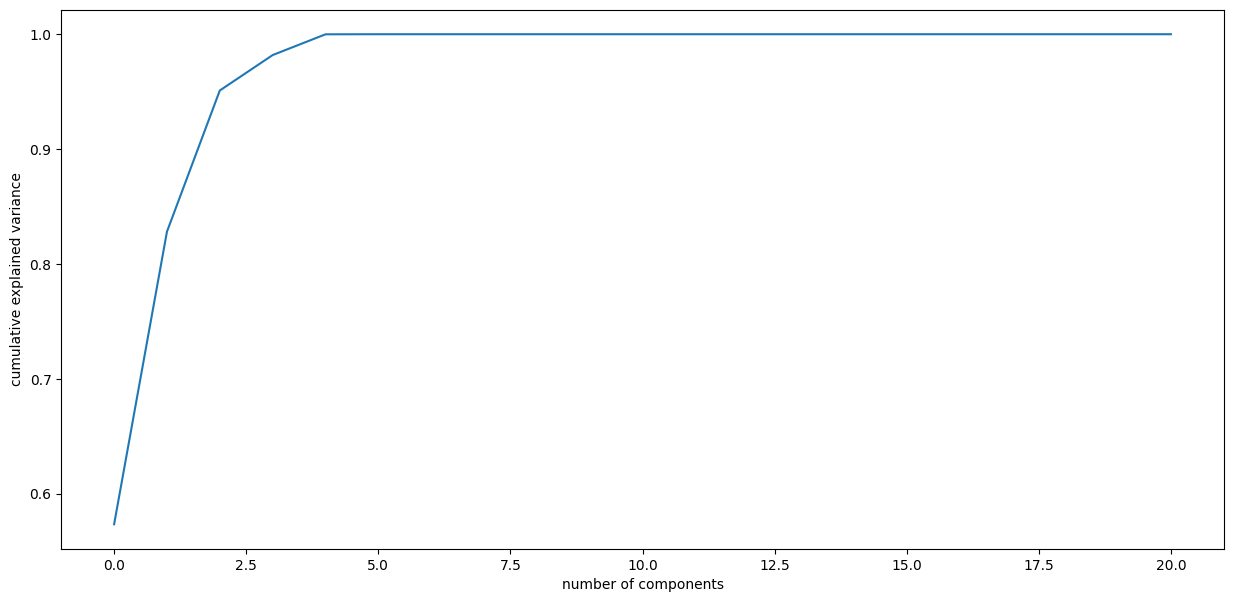

In [50]:
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:5]))
plt.figure(figsize=(15,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Al llegar a las 5 componentes ya se obtiene un 99.9% de la varianza, por lo que solo antes de las 5 componentes se pueden observar cambios significativos en los datos proyectados

<ipython-input-39-fccd6acffa84>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projectedZ[:, 0], projectedZ[:, 1], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))


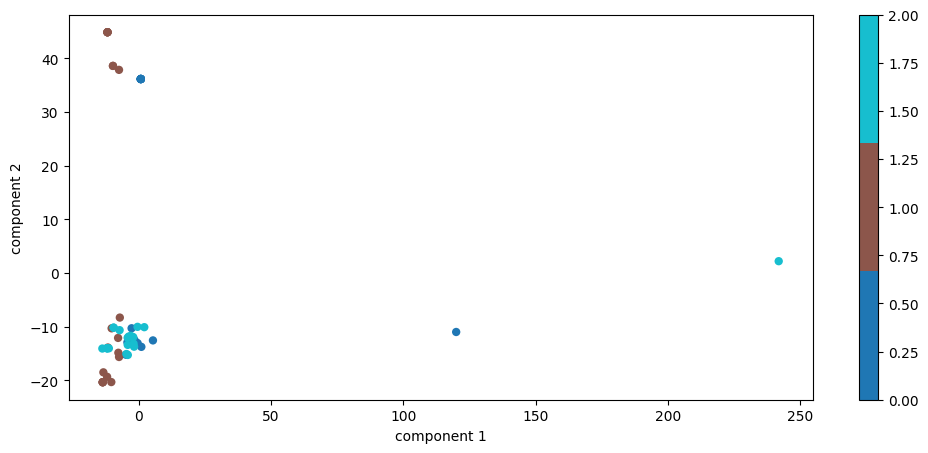

In [39]:
plt.figure(figsize=(12,5))
plt.scatter(projectedZ[:, 0], projectedZ[:, 1], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [40]:
def projectedZ_Components(n,data):
  pca = PCA(n_components = n)
  projectedZ = pca.fit_transform(data)
  BasisW = pca.components_
  print("Dataframe size: ", data.shape)
  print("Z Projection size: ", projectedZ.shape)
  print("PCA explained variance: ", pca.explained_variance_)
  print("W Projection size: ", BasisW.shape)
  return projectedZ

Dataframe size:  (63, 21)
Z Projection size:  (63, 2)
PCA explained variance:  [1237.16959613  549.45863779]
W Projection size:  (2, 21)


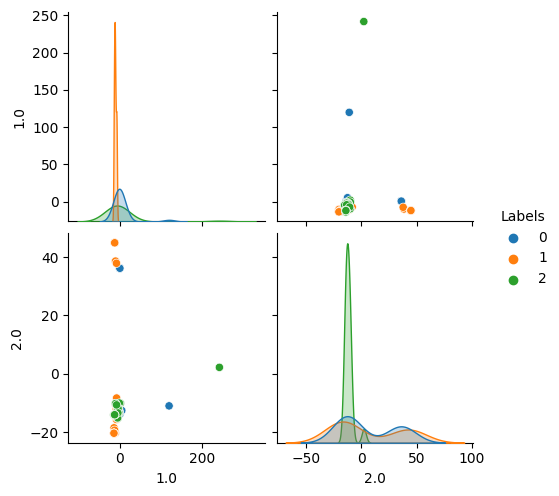

In [41]:
n = 2
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 21)
Z Projection size:  (63, 4)
PCA explained variance:  [1237.16959613  549.45863779  265.10066955   66.52437816]
W Projection size:  (4, 21)


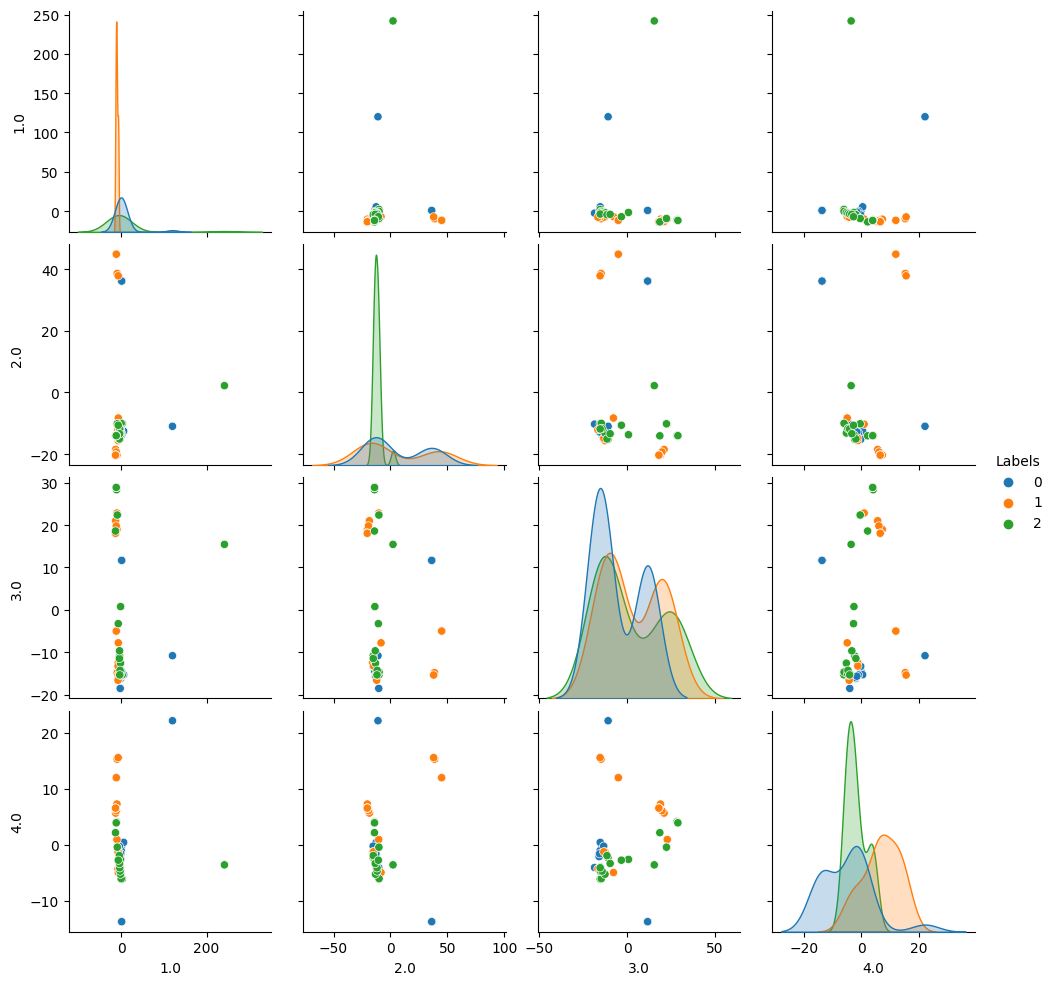

In [42]:
n = 4
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 21)
Z Projection size:  (63, 8)
PCA explained variance:  [1.23716960e+03 5.49458638e+02 2.65100670e+02 6.65243782e+01
 3.90024110e+01 1.63788311e-01 5.17434718e-05 2.86011581e-05]
W Projection size:  (8, 21)


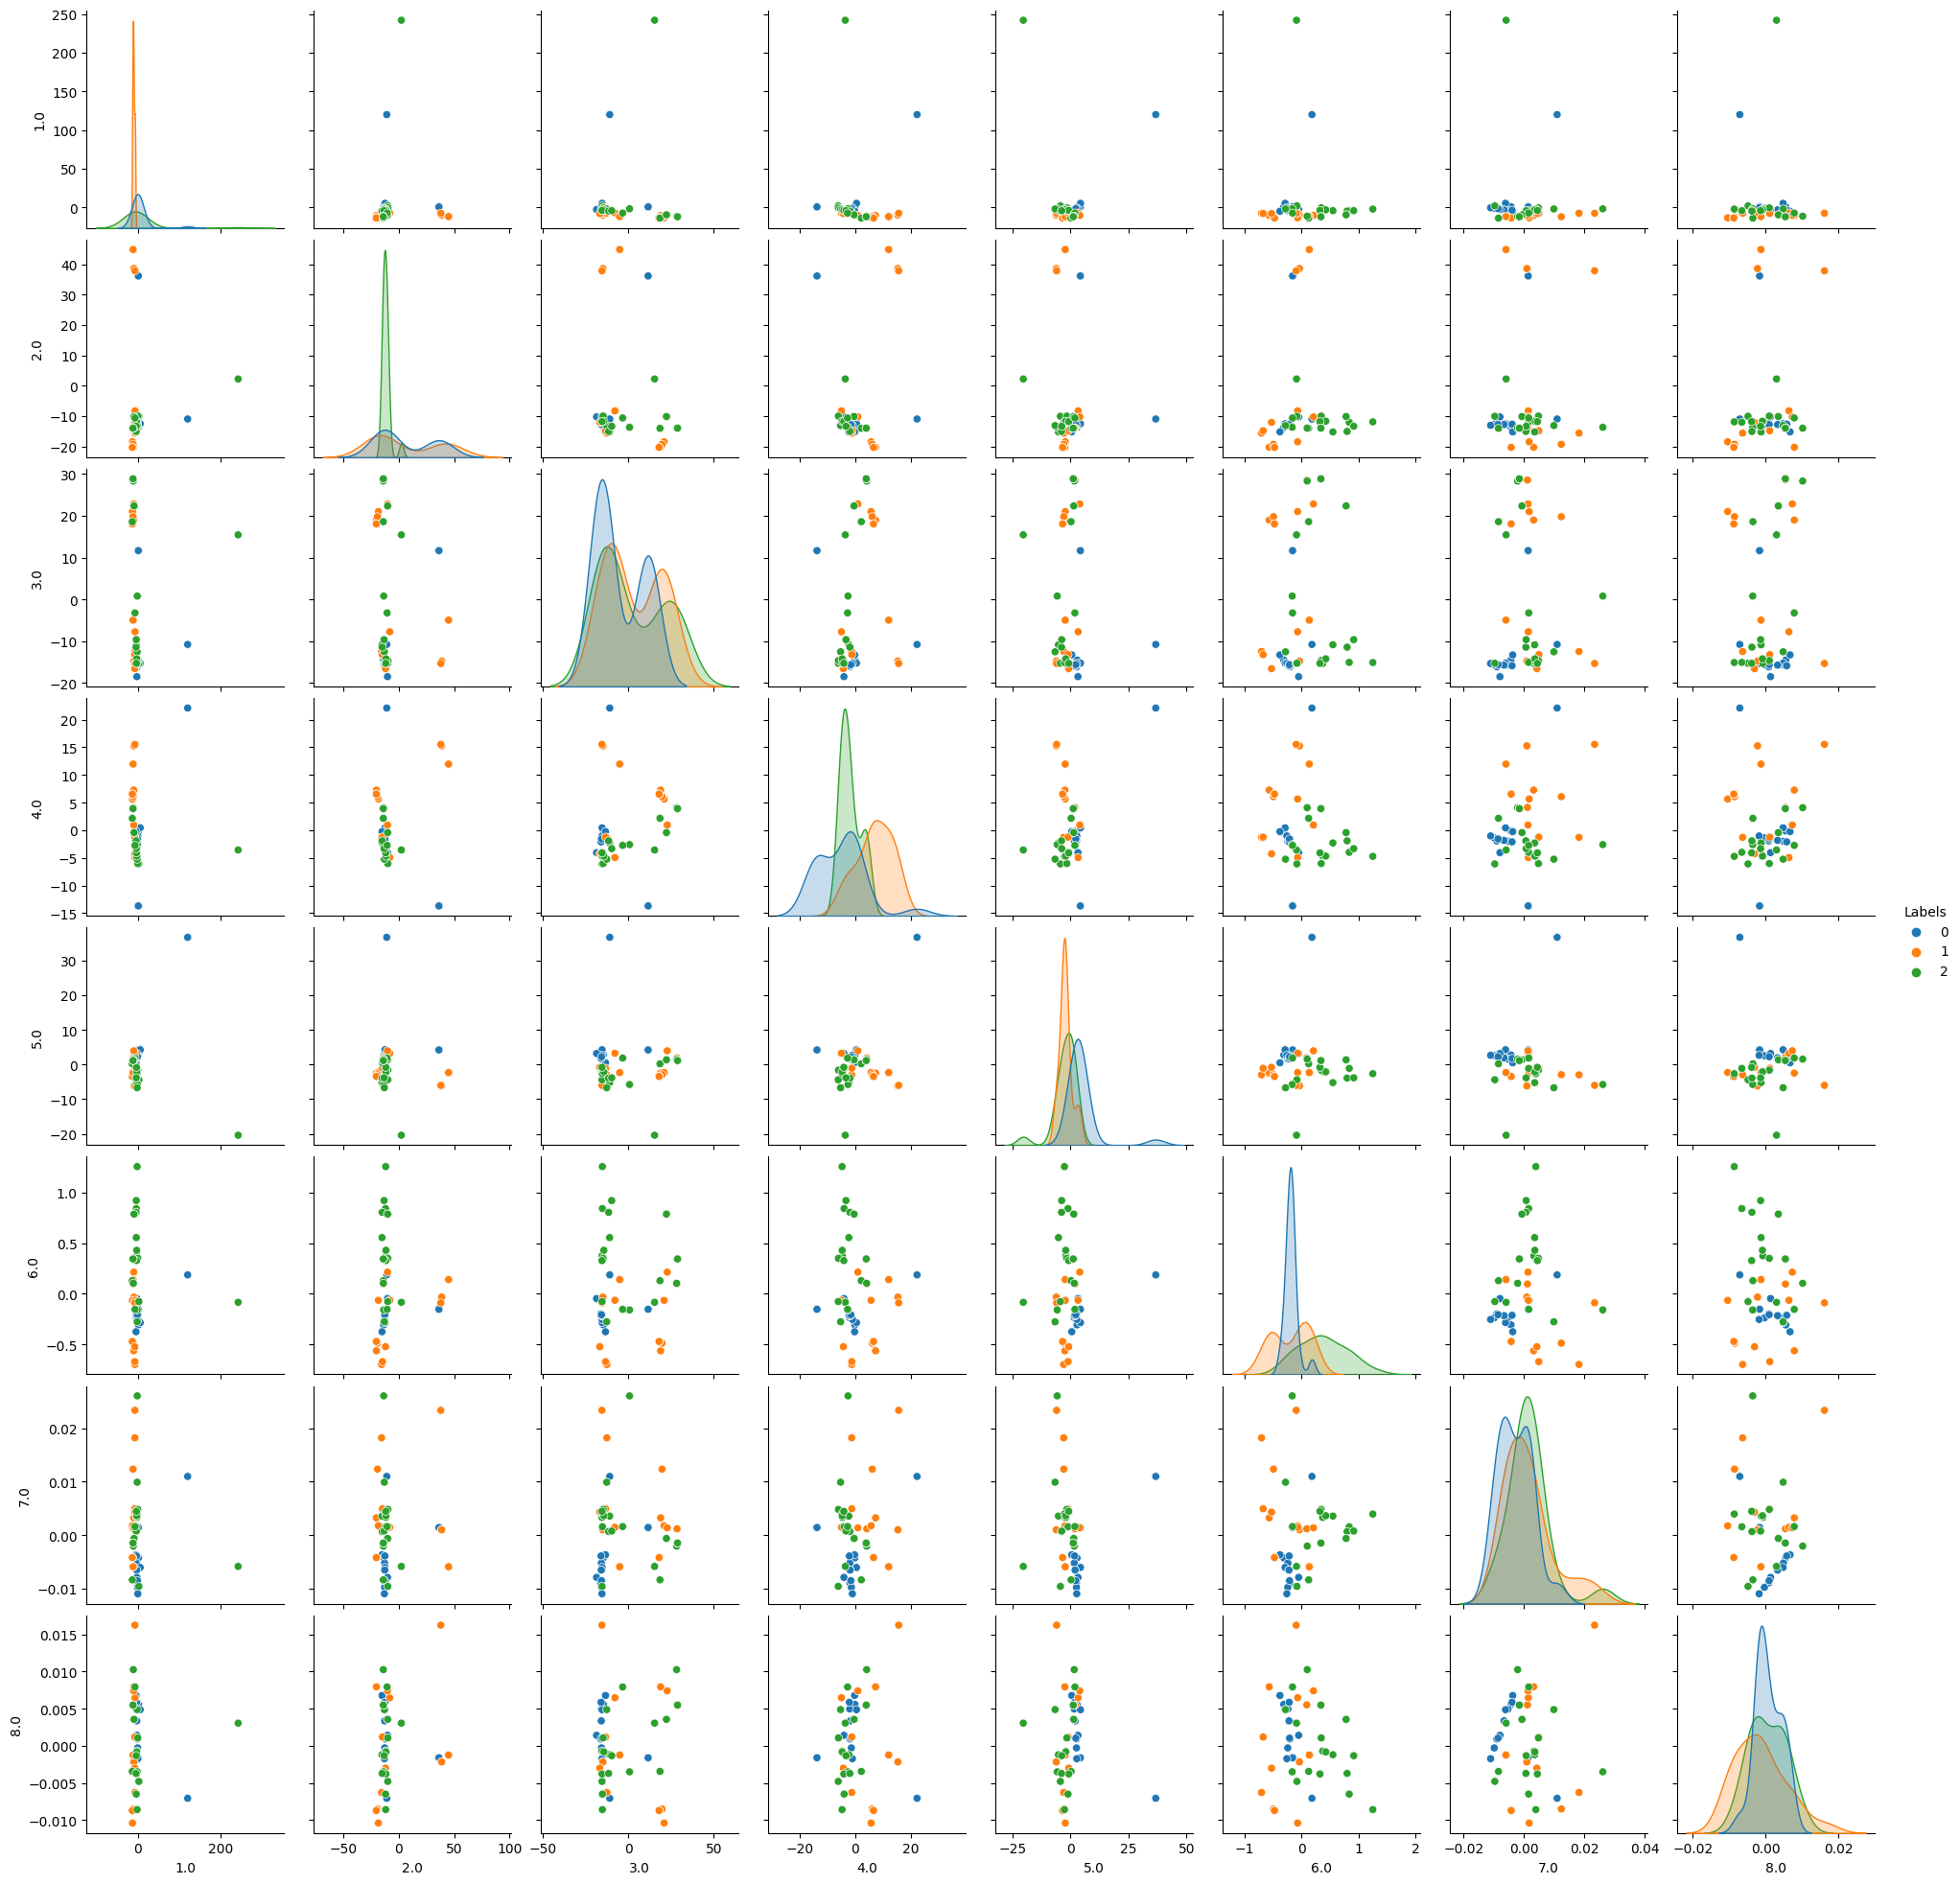

In [43]:
n = 8
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Para el análisis, se debe tener en cuenta que las etiquetas azules son Telesismo, las naranjadas son local y las verdes son regional.

En las primeras 4 componentes, no se logra observar un cambio, y todos los puntos siguen bastante agrupados. En 5 se pueden empezar a notar algunos desagrupamientos leves. En 6 componentes, se pueden observar algunos agrupamientos entre colores, y aunque no es muy notorio si da resultados mejores a los que se tenían en el miniproyecto 1.

In [53]:
def Logistic_Regression(X, Y):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123)

  # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X_train, y_train)

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, logreg.predict(X_train))
  cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

  Acc_test = accuracy_score(y_test, logreg.predict(X_test))
  cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

  print('Acuracy Train: ',Acc_train)
  print('Acuracy Test: ',Acc_test)

  ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional'])
  ax1.plot()
  plt.show()

  ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional'])
  ax2.plot()
  plt.show()
  return None

def Bayessian_Regression(X, t):
  pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
  pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
  pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)

  # Seleccionamos los X de la clase 1
  X1 = X[t == 0]
  mu_C1 = np.mean(X1,axis = 0)
  # Seleccionamos los X de la clase 2
  X2 = X[t == 1]
  mu_C2 = np.mean(X2,axis = 0)
  # Seleccionamos los X de la clase 3
  X3 = X[t == 2]
  mu_C3 = np.mean(X3,axis = 0)

  plt.scatter(X[:,0],X[:,1],c = t)
  plt.plot(mu_C1[0],mu_C1[1],'or')
  plt.plot(mu_C2[0],mu_C2[1],'dg')
  plt.plot(mu_C3[0],mu_C3[1],'sy')

  N1 = np.sum(np.where(t == 0, 1., 0.))
  MU_1 = np.tile(mu_C1,(np.int(N1),1))
  S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)

  N2 = np.sum(np.where(t == 1, 1., 0.))
  MU_2 = np.tile(mu_C2,(np.int(N2),1))
  S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)

  N3 = np.sum(np.where(t == 2, 1., 0.))
  MU_3 = np.tile(mu_C3,(np.int(N3),1))
  S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

  N = N1 + N2 + N3
  Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

  invSigma = np.linalg.inv(Sigma)
  w_C1 = invSigma@mu_C1
  w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

  w_C2 = invSigma@mu_C2
  w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

  w_C3 = invSigma@mu_C3
  w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

  # Para las activaciones
  A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
  A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
  A3 = (X@w_C3 + w_30).reshape(np.int(N),1)
  A = np.concatenate((A1,A2,A3),axis = 1)

  expA = np.exp(A)
  aux = np.sum(expA,axis = 1).reshape(int(N),1)
  auxM = np.tile(aux,(1,3))

  p_Ck_dado_X =  expA/auxM # Posterior: y_Est
  t_Est = np.argmax(p_Ck_dado_X, axis = 1)

  Acc = accuracy_score(t,t_Est)
  cMat = confusion_matrix(t,t_Est)

  print('Accuracy: ',Acc)
  
  ax = ConfusionMatrixDisplay(cMat, display_labels = ['telesismo','local','regional'])
  ax.plot()
  plt.show()
  return None

## Regresión logística para los datos de entrada

Acuracy Train:  0.6808510638297872
Acuracy Test:  0.8125


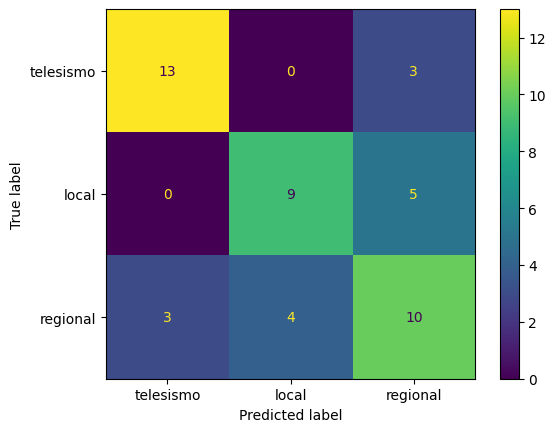

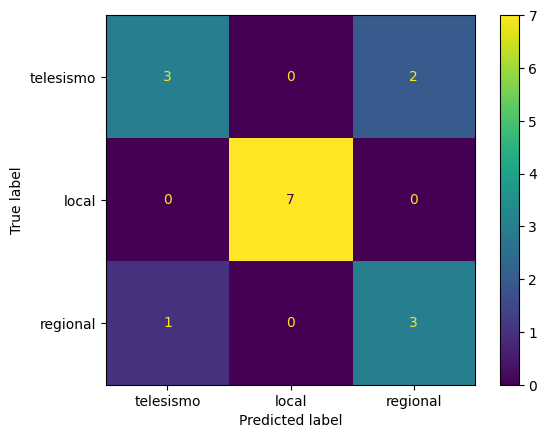

In [54]:
X = dataSismo[:, 2:4]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tags
Logistic_Regression(X, Y)